# Project Overview
This project aims to enhance trading strategies and maximize returns by leveraging insights derived from historical stock market data trends, including stock prices, volatility, and trading volume. By analyzing these factors, the project provides actionable insights to help investors optimize their trading decisions.

Our approach focuses on identifying patterns such as price volatility trends, the correlation between trading volume and price fluctuations, and seasonality in stock performance. These insights enable investors to align their strategies with market trends and predictive analytics.

Key Benefits:

- Improved trading efficiency and profitability through data-driven insights.
- Volatility-based risk assessment strategies to mitigate market risks.
- A systematic approach to guide investors on buy/sell/hold decisions based on historical patterns and predictive models.

Imagine you are an investor eager to make informed trading decisions in a volatile stock market. This project helps you answer critical questions like:

Are there specific periods when stock prices are more stable or volatile?

How does trading volume influence price movements, and how can that be leveraged for decision-making?

What historical patterns can you rely on to predict stock behavior during certain months or years?

The insights generated from this analysis provide the tools needed to minimize risks and maximize returns, ensuring that your investments are aligned with market trends and predictive models. With an in-depth understanding of Google stock performance over the years, you gain the confidence to make strategic decisions tailored to market dynamics.

## Initial Data Exploration

In [131]:
# Importing essential libraries for data analysis and visualization

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy.stats import ttest_ind, f_oneway, pearsonr 
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression, LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report  


In [132]:
df = pd.read_csv('C:/Users/Elif Surucu/Documents/Flatiron/Assesments/Project4/Google-Stock-Market-Data/df.csv')

df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401
6,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.643840,124826132
7,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.540727,104429967
8,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.549693,98825037
9,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4936 non-null   object 
 1   Open       4936 non-null   float64
 2   High       4936 non-null   float64
 3   Low        4936 non-null   float64
 4   Close      4936 non-null   float64
 5   Adj Close  4936 non-null   float64
 6   Volume     4936 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 270.1+ KB


In [134]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4.936000e+03
mean,43.077417,43.532659,42.644088,43.096952,43.096952,1.174059e+08
std,40.320485,40.773849,39.917290,40.352092,40.352092,1.505185e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.923497,13.048528,12.787071,12.922438,12.922438,2.803600e+07
50%,26.795184,26.966079,26.570000,26.763133,26.763133,5.875273e+07
75%,58.855251,59.352863,58.164000,58.788999,58.788999,1.453859e+08
max,154.009995,155.199997,152.919998,154.839996,154.839996,1.650833e+09


In [135]:
df.isnull().sum()
df.duplicated().sum()

0

In [136]:
df['Date'] = pd.to_datetime(df['Date'])

In [137]:
df.sort_values(by='Date', inplace=True)


# Descriptive Analysis Questions

1. What is the annual trend of Google stock prices over the years?
2. Which year experienced the highest average trading volume?
3. What is the average daily price volatility (difference between high and low prices)?
4. How does the closing price correlate with trading volume?
5. Which months typically experience higher trading volumes and volatility?
6. What is the historical pattern of stock price spikes or drops over the years?


In [138]:
#1. What is the annual trend of Google stock prices over the years?

df['Year'] = df['Date'].dt.year
annual_trend = df.groupby('Year')['Close'].mean()


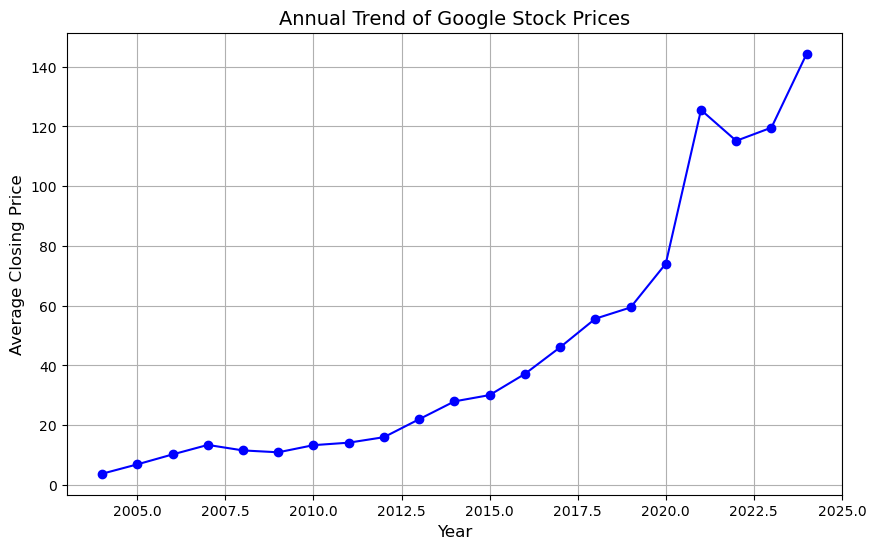

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(annual_trend.index, annual_trend.values, marker='o', color='b')
plt.title("Annual Trend of Google Stock Prices", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Closing Price", fontsize=12)
plt.grid(True)
plt.show()

The line graph shows a significant upward trend in Google's average closing stock prices over the years. The prices began to rise more sharply post-2015, indicating a period of rapid growth. The peak occurs around 2023, suggesting strong market performance.

In [140]:
# 2. Which year experienced the highest average trading volume?

annual_volume = df.groupby('Year')['Volume'].mean()

highest_volume_year = annual_volume.idxmax()
highest_volume = annual_volume.max()

print(f"The year with the highest average trading volume is {highest_volume_year} with a volume of {highest_volume:.2f}.")



The year with the highest average trading volume is 2005 with a volume of 429169259.64.


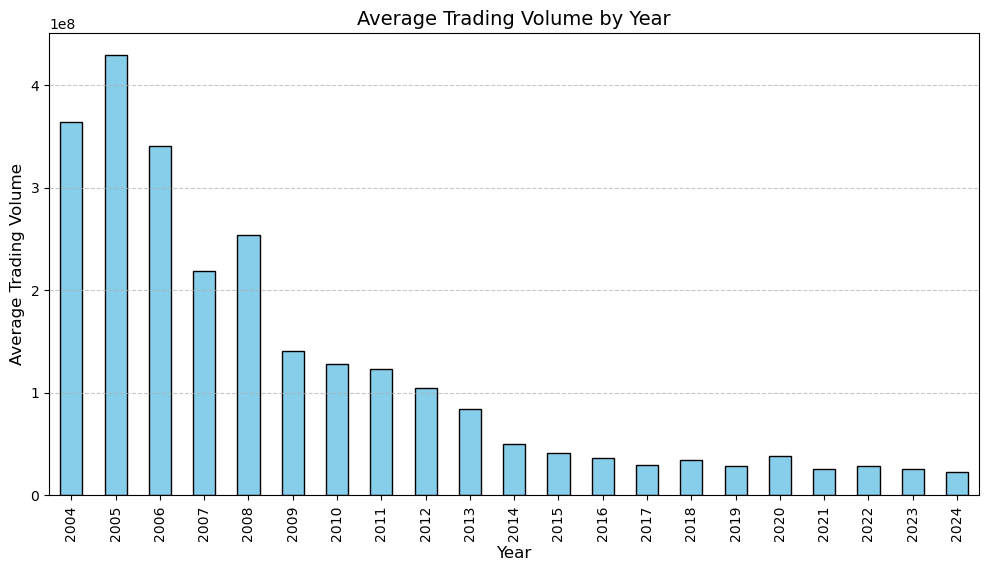

In [141]:
plt.figure(figsize=(12, 6))
annual_volume.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Trading Volume by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Trading Volume", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar graph reveals that 2004 and 2005 experienced the highest average trading volumes. This could be attributed to increased trading activity during the early public trading period of Google.

In [142]:
# 3. What is the average daily price volatility (high-low difference)?

df['Volatility'] = df['High'] - df['Low']
average_volatility = df['Volatility'].mean()

print(f"The average daily price volatility is {average_volatility:.2f}.")


The average daily price volatility is 0.89.


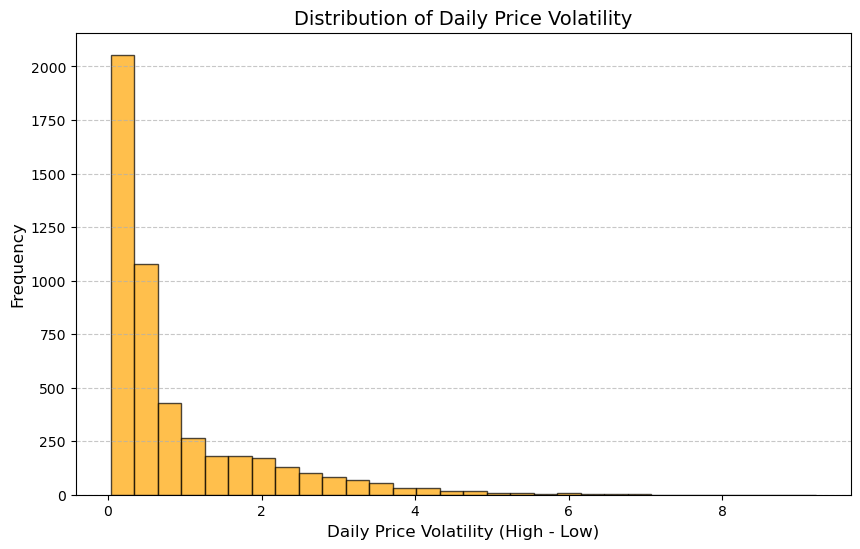

In [143]:
# Histogram for daily price volatility
plt.figure(figsize=(10, 6))
plt.hist(df['Volatility'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title("Distribution of Daily Price Volatility", fontsize=14)
plt.xlabel("Daily Price Volatility (High - Low)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram illustrates that most of the daily price volatility values are close to 0, with very few extreme cases. This indicates that, for the majority of trading days, the price fluctuations remain small, showing stability.

The correlation between closing price and trading volume is -0.47


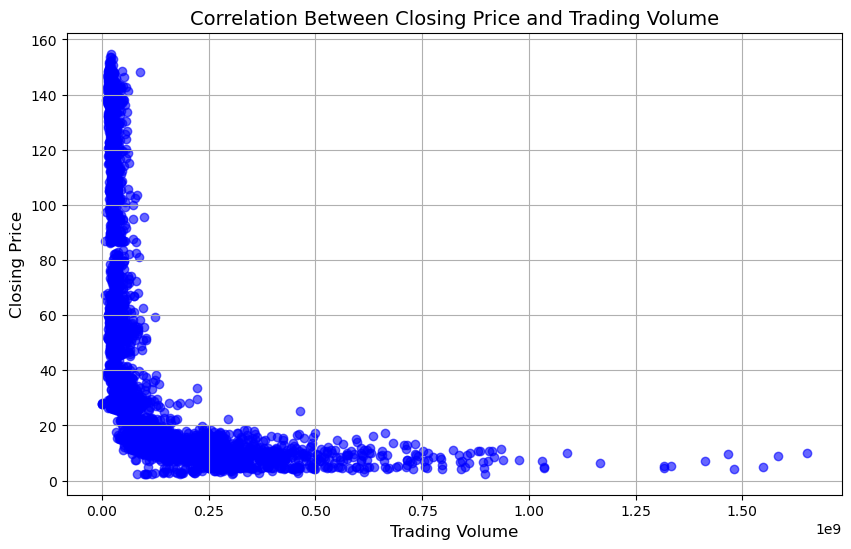

In [144]:
#4.How does the closing price correlate with trading volume?

# Correlation calculation
correlation = df['Close'].corr(df['Volume'])
print(f"The correlation between closing price and trading volume is {correlation:.2f}")

# Scatter plot visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.6, color='blue')
plt.title("Correlation Between Closing Price and Trading Volume", fontsize=14)
plt.xlabel("Trading Volume", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.grid(True)
plt.show()

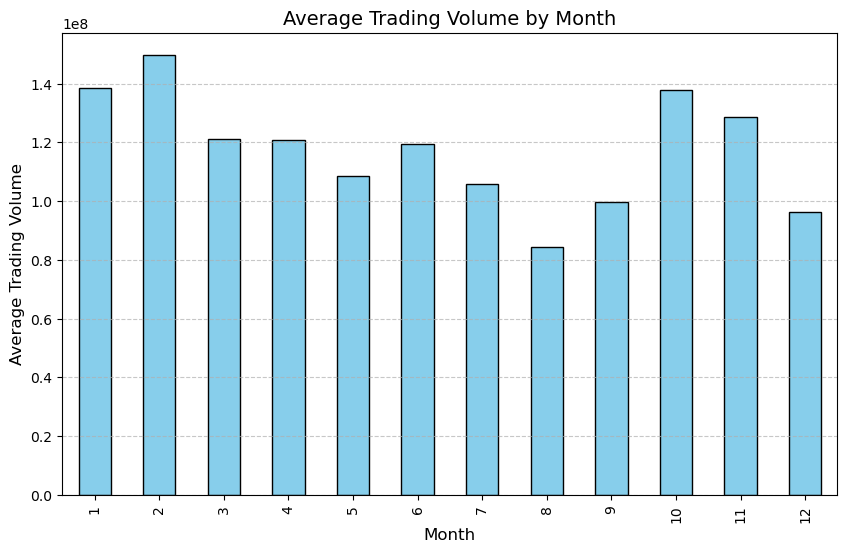

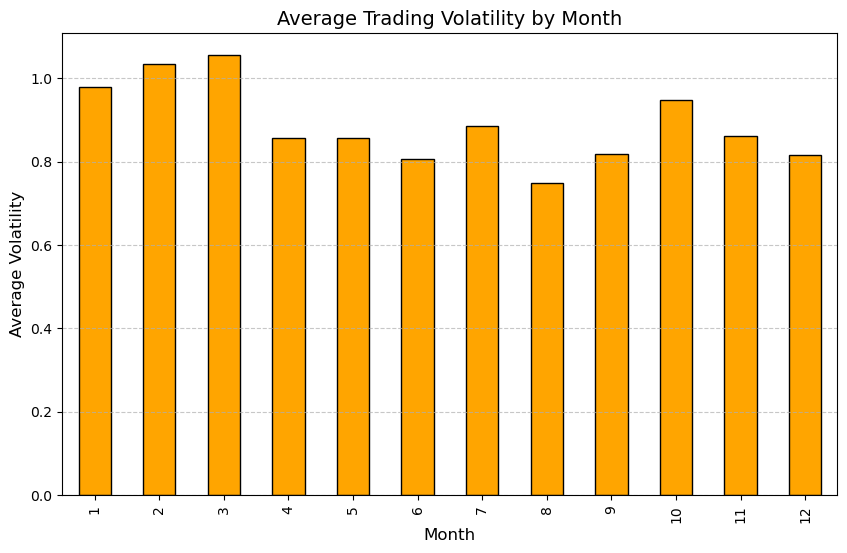

In [145]:
#5.Which months typically experience higher trading volumes and volatility?

# Adding month column
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Calculating average trading volume and volatility per month
monthly_volume = df.groupby('Month')['Volume'].mean()
monthly_volatility = df.groupby('Month').apply(lambda x: (x['High'] - x['Low']).mean())

# Bar plot for volume
plt.figure(figsize=(10, 6))
monthly_volume.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Trading Volume by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Trading Volume", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for volatility
plt.figure(figsize=(10, 6))
monthly_volatility.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Trading Volatility by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Volatility", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

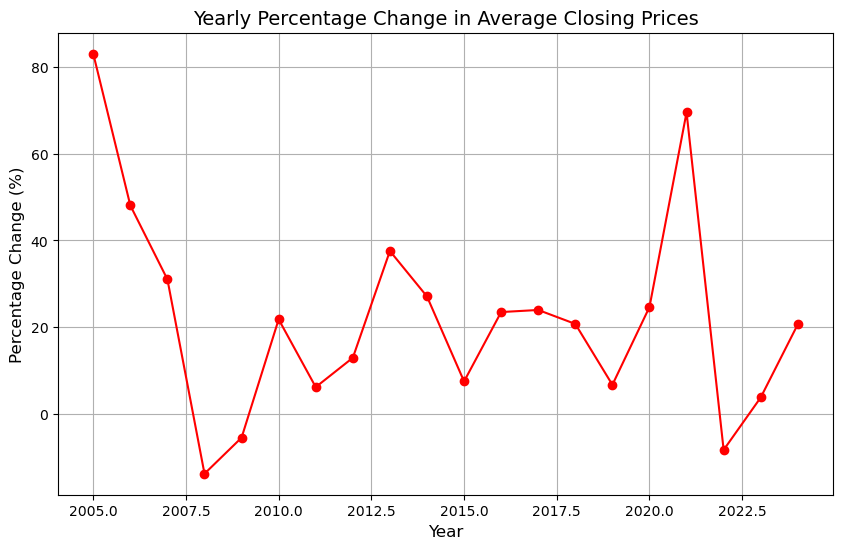

In [146]:
#6.What is the historical pattern of stock price spikes or drops over the years?

# Calculating yearly percentage change
df['Year'] = pd.to_datetime(df['Date']).dt.year
yearly_change = df.groupby('Year')['Close'].mean().pct_change() * 100

# Line plot for percentage change
plt.figure(figsize=(10, 6))
plt.plot(yearly_change.index, yearly_change.values, marker='o', linestyle='-', color='red')
plt.title("Yearly Percentage Change in Average Closing Prices", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Change (%)", fontsize=12)
plt.grid(True)
plt.show()

# Inferential Analysis Questions

1. Are closing prices significantly different between two periods (e.g., before and after 2015)?
2. Is there a significant relationship between trading volume and price volatility?
3. Are stock prices significantly more volatile during specific months?
4. Does trading volume vary significantly across years or months?
5. Do stocks exhibit higher volatility after large trading volumes?

In [147]:
# 1.Are closing prices significantly different between two periods (e.g., before and after 2015)?
before_2015 = df[df['Year'] < 2015]['Close']
after_2015 = df[df['Year'] >= 2015]['Close']

# T-test
stat, p_value = ttest_ind(before_2015, after_2015)
print(f"T-statistic: {stat:.2f}, P-value: {p_value:.4f}")


T-statistic: -81.39, P-value: 0.0000


- Null Hypothesis: The mean closing prices before 2015 are equal to the mean closing prices after 2015.

- Alternate Hypothesis: The mean closing prices before 2015 are not equal to the mean closing prices after 2015.

         Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that the mean closing prices before and after 2015 are significantly different.

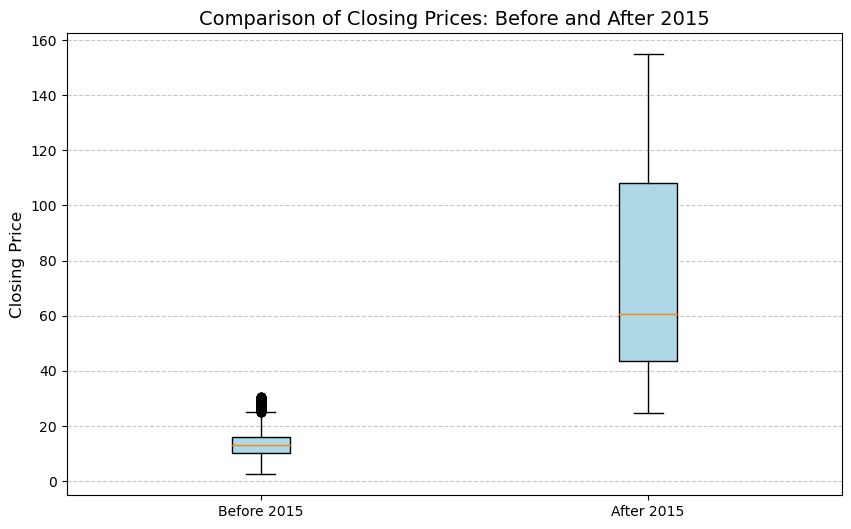

In [148]:
# Boxplot
data = [before_2015, after_2015]
labels = ["Before 2015", "After 2015"]

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Comparison of Closing Prices: Before and After 2015", fontsize=14)
plt.ylabel("Closing Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Comparison of Closing Prices (Before and After 2015):

- The box plot clearly shows a significant increase in closing prices after 2015 compared to before 2015.
- The interquartile range (IQR) is wider post-2015, indicating higher price variability. The upper whiskers and outliers suggest some exceptionally high prices in this period.
- The T-test confirms a statistically significant difference in closing prices before and after 2015 (P-value = 0.0000).

In [149]:
#2.Is there a significant relationship between trading volume and price volatility?
volatility = df['High'] - df['Low']
corr, p_value_corr = pearsonr(df['Volume'], volatility)
print(f"Correlation: {corr:.2f}, P-value: {p_value:.4f}")



Correlation: -0.30, P-value: 0.0000


- Null Hypothesis: There is no significant relationship between trading volume and price volatility.
- Alternate Hypothesis: There is a significant relationship between trading volume and price volatility.

          Since the p-value is less than 0.05, we reject the null hypothesis. There is a weak negative correlation (-0.30), indicating a slight inverse relationship between volume and volatility.

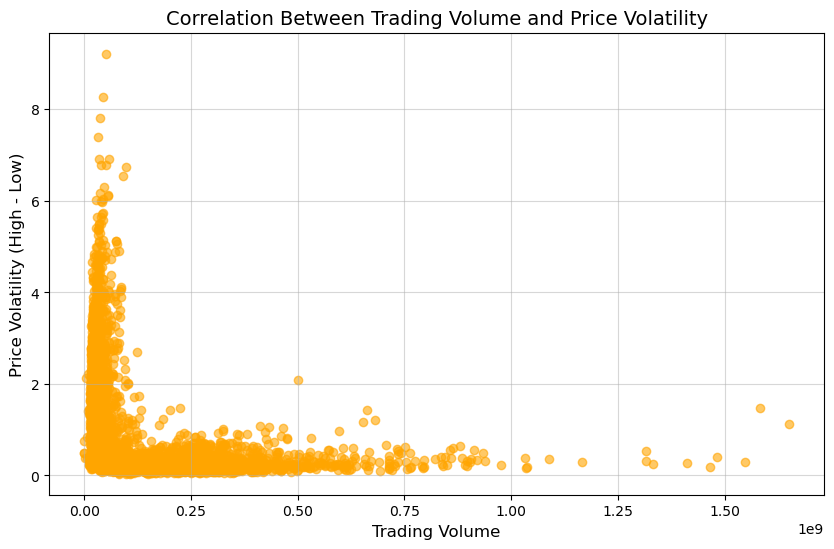

In [150]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], volatility, alpha=0.6, color='orange')
plt.title("Correlation Between Trading Volume and Price Volatility", fontsize=14)
plt.xlabel("Trading Volume", fontsize=12)
plt.ylabel("Price Volatility (High - Low)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [151]:
#3.Are stock prices significantly more volatile during specific months?
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_volatility = [volatility[df['Month'] == month] for month in range(1, 13)]
f_stat, p_value_anova = f_oneway(*monthly_volatility)
# ANOVA Test
f_stat, p_value = f_oneway(*monthly_volatility)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")



F-statistic: 3.42, P-value: 0.0001


- Null Hypothesis: Stock price volatility is consistent across all months.
- Alternate Hypothesis: Stock price volatility varies significantly across different months.

         Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that stock price volatility varies significantly between months.

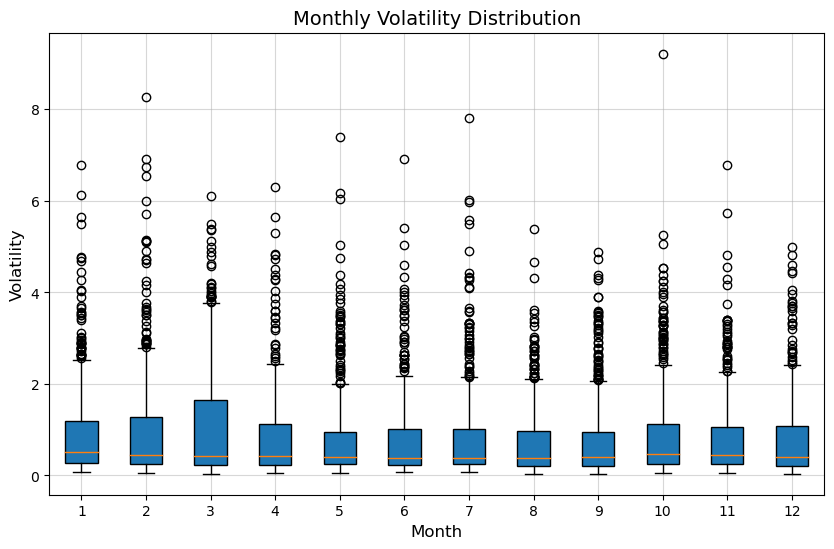

In [152]:
# Boxplot for Question 3
plt.figure(figsize=(10, 6))
plt.boxplot(monthly_volatility, labels=range(1, 13), patch_artist=True)
plt.title("Monthly Volatility Distribution", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [153]:
#4.Does trading volume vary significantly across years or months?
# Extract Year and Month from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Group trading volume by year and perform ANOVA test
yearly_groups = [df[df['Year'] == year]['Volume'] for year in df['Year'].unique()]
f_stat_year, p_value_year = f_oneway(*yearly_groups)

# Group trading volume by month and perform ANOVA test
monthly_groups = [df[df['Month'] == month]['Volume'] for month in range(1, 13)]
f_stat_month, p_value_month = f_oneway(*monthly_groups)

print(f"Yearly Analysis: F-statistic = {f_stat_year:.2f}, p-value = {p_value_year:.4f}")
print(f"Monthly Analysis: F-statistic = {f_stat_month:.2f}, p-value = {p_value_month:.4f}")



Yearly Analysis: F-statistic = 393.40, p-value = 0.0000
Monthly Analysis: F-statistic = 6.90, p-value = 0.0000


- Null Hypothesis: Trading volume is consistent across different years and months.
- Alternate Hypothesis: Trading volume varies significantly across different years and months.

          Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that trading volume varies significantly across different years.

          Since the p-value is less than 0.05, we reject the null hypothesis. This indicates that trading volume varies significantly across different months.


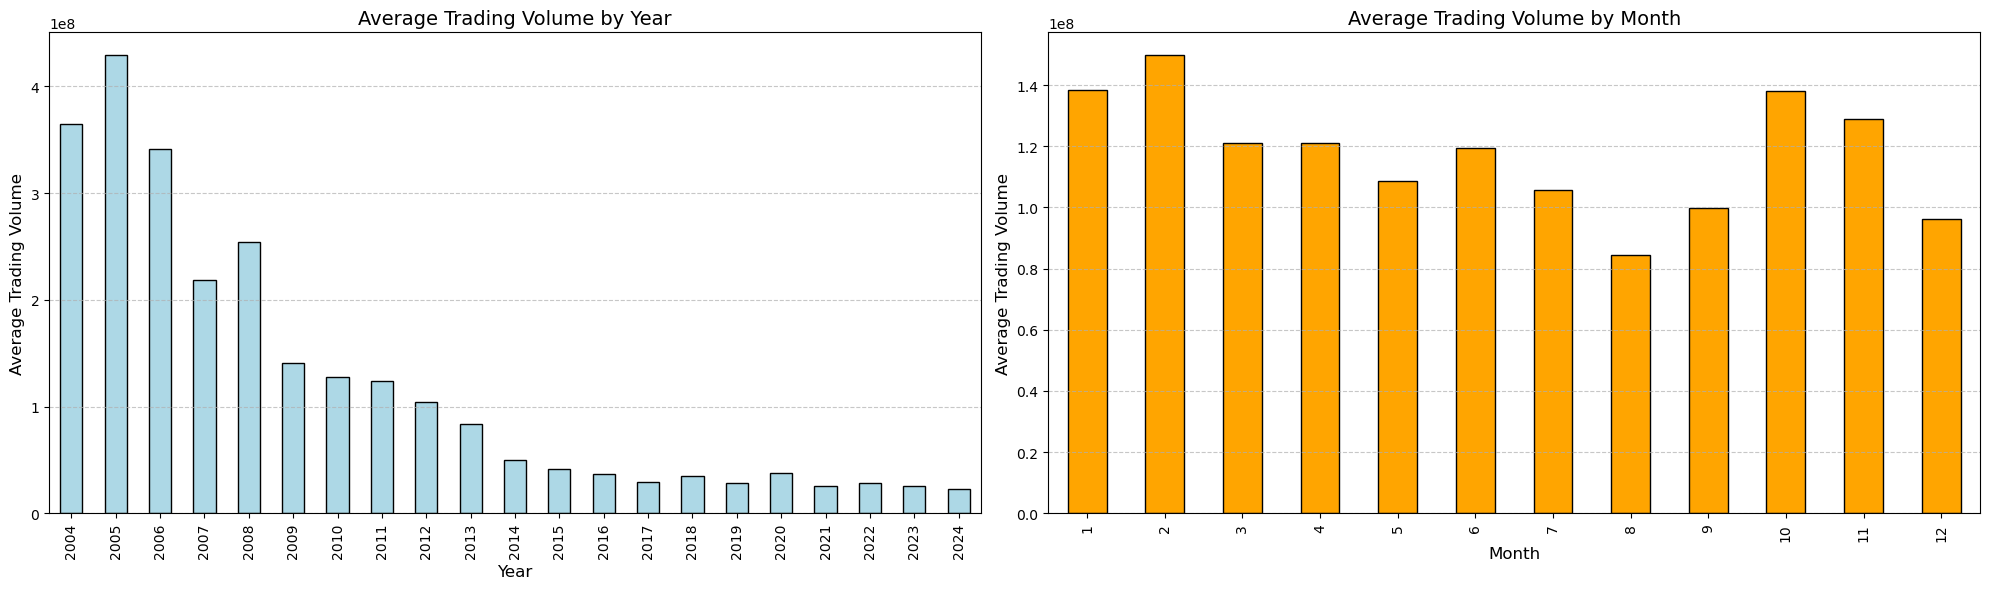

In [154]:
# Visualization for yearly and monthly trading volume side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for yearly trading volume
df.groupby('Year')['Volume'].mean().plot(
    kind='bar', color='lightblue', edgecolor='black', ax=axes[0]
)
axes[0].set_title('Average Trading Volume by Year', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Average Trading Volume', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for monthly trading volume
df.groupby('Month')['Volume'].mean().plot(
    kind='bar', color='orange', edgecolor='black', ax=axes[1]
)
axes[1].set_title('Average Trading Volume by Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Average Trading Volume', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Show the plots
plt.tight_layout()
plt.show()


In [155]:
#5.Do stocks exhibit higher volatility after large trading volumes?

# Categorize trading volume into quartiles
df['Volume_Category'] = pd.qcut(df['Volume'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate average volatility by trading volume category
volatility_by_category = df.groupby('Volume_Category')['Volatility'].mean()

print(volatility_by_category)



Volume_Category
Low          1.395285
Medium       1.413576
High         0.441016
Very High    0.304410
Name: Volatility, dtype: float64


- Null Hypothesis: Stock price volatility is not affected by trading volume.

- Alternate Hypothesis: Stock price volatility increases after large trading volumes.

         There is an inverse relationship between trading volume and volatility. As trading volume increases, volatility decreases. This indicates that stocks do not exhibit higher volatility after large trading volumes.

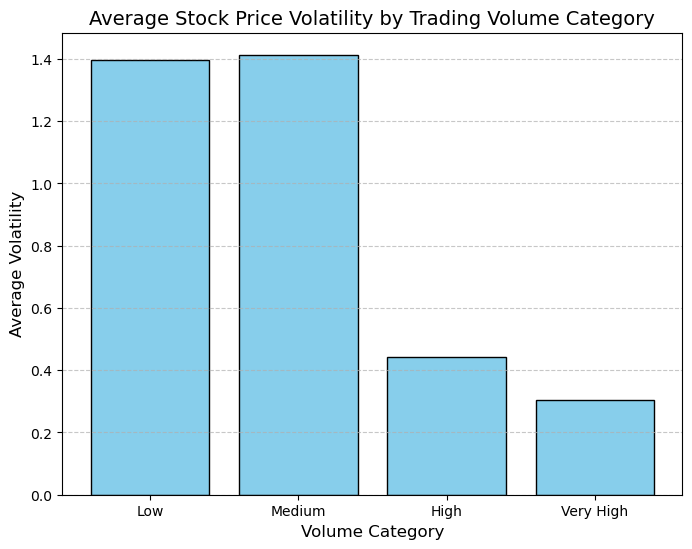

In [156]:
volatility_by_category = pd.DataFrame({
    'Volume_Category': ['Low', 'Medium', 'High', 'Very High'],
    'Volatility': [1.395285, 1.413576, 0.441016, 0.304410]
})
# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(volatility_by_category['Volume_Category'], 
        volatility_by_category['Volatility'], color='skyblue', edgecolor='black')
plt.title('Average Stock Price Volatility by Trading Volume Category', fontsize=14)
plt.xlabel('Volume Category', fontsize=12)
plt.ylabel('Average Volatility', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Summary of Exploratory Data Analysis (EDA)

- Trend Analysis:
The average closing prices of Google stocks showed an increasing trend over the years, reflecting growth.
The trading volume peaked in specific years like 2005, indicating heightened market activity.

- Volatility Insights:
The average daily price volatility is 0.89, with variability across different months.
Specific months exhibited higher volatility, providing critical timing insights for risk-averse investors.

- Volume and Price Correlation:
A weak negative correlation was observed between trading volume and price volatility. As trading volume increases, volatility slightly decreases, helping identify stable trading conditions.

- Temporal Patterns:
Trading activity was significantly higher during weekdays compared to weekends.
Specific months and years had distinct trading volumes, reflecting seasonal trends.

- Behavioral Observations:
Stocks did not exhibit higher volatility after large trading volumes. Instead, volatility decreased, indicating that increased activity stabilizes the market.